In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Loading the data
To get started let's first load in the data! We will make use of the helper functions provided in `data_utils.py`

In [2]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

def load_images(images_path):
    """
    Load images from a specified .npz file.

    Parameters:
    - images_path (str): The file path to the .npz file containing the images.

    Returns:
    - images (list): A list of numpy arrays, each representing an image loaded from the .npz file.
    """
    data = np.load(images_path, allow_pickle=True)
    images = [data[f"image_{i}"] for i in range(len(data.files))]
    return images

def load_labels(labels_path):
    """
    Load labels from a specified .npy file.

    Parameters:
    - labels_path (str): The file path to the .npy file containing the labels.

    Returns:
    - labels (numpy.ndarray): An array of labels loaded from the .npy file.
    """
    labels = np.load(labels_path, allow_pickle=True)
    return labels

def get_images(data_dir, disaster, split="train"):
    """
    Load images from a specified disaster dataset split.

    Args:
        data_dir (str): The directory where the dataset is stored.
        disaster (str): The disaster type of the dataset.
        split    (str): The train or test split (default train).

    Returns:
        list: A list of images (as numpy arrays) from the specified dataset split.
    """
    images_path = os.path.join(data_dir, disaster, f"{split}_images.npz")
    return load_images(images_path)


def get_labels(data_dir, disaster, split="train"):
    """
    Load labels for a specified disaster dataset split.

    Args:
        data_dir (str): The directory where the dataset is stored.
        disaster (str): The disaster type of the dataset.
        split    (str): The train or test split (default train).

    Returns:
        ndarray: The labels for the images in the specified dataset split.
    """
    labels_path = os.path.join(data_dir, disaster, f"{split}_labels.npy")
    return load_labels(labels_path)


def convert_dtype(images, dtype=np.float32):
    """
    Convert the data type of a collection of images.

    Args:
        images (list or dict): The images to convert, either as a list or dictionary of numpy arrays.
        dtype (data-type): The target data type for the images. Defaults to np.float32.

    Returns:
        The converted collection of images, in the same format (list or dict) as the input.
    """
    if isinstance(images, dict):
        return {k: v.astype(dtype) for k, v in images.items()}
    elif isinstance(images, list):
        return [img.astype(dtype) for img in images]
    else:
        raise TypeError("Unsupported type for images. Expected list or dict.")


def plot_label_distribution(labels, ax=None, title="Label Distribution"):
    """
    Plot the distribution of labels.

    Args:
        labels (ndarray): An array of labels to plot the distribution of.
        ax (matplotlib.axes.Axes, optional): The matplotlib axis on which to plot.
                                             If None, a new figure and axis are created.
        title (str, optional): The title for the plot. Defaults to "Label Distribution".
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
        created_fig = True  # Flag indicating a figure was created within this function
    else:
        created_fig = False

    sns.countplot(x=labels, ax=ax, palette="viridis")
    ax.set_title(title)
    ax.set_xlabel("Labels")
    ax.set_ylabel("Count")

    if created_fig:
        plt.tight_layout()
        plt.show()


The following is the list of disasters in our dataset. 

In [3]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]

We will load each disaster train dataset into a dictionary. Recall that each disaster consists of images and labels (0 - 3) of the damage level.

In [4]:
data = {}
split = "train"
with open('config.json') as config_file:
    config = json.load(config_file)
    data_dir = config['data_dir']

for disaster in disaster_list:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    data[disaster] = {"images": images, "labels": labels}

Loading train images and labels for hurricane-matthew dataset...
Loading train images and labels for socal-fire dataset...
Loading train images and labels for midwest-flooding dataset...


Let's visualize an image and its label in the dataset. 

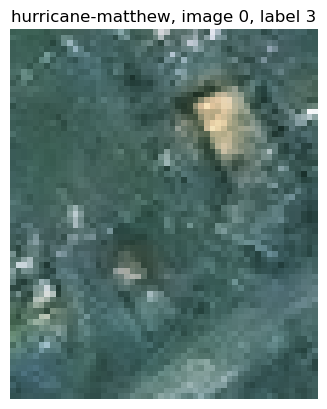

image shape: (65, 54, 3)


In [5]:
disaster = disaster_list[0]
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# index of the image to display
idx = 0
img = images[idx]
label = labels[idx]

plt.title(f"{disaster}, image {idx}, label {label}")
plt.imshow(img.astype(np.uint8))
plt.axis("off")
plt.show()

#
print(f"image shape: {img.shape}")

# Extracting Color Information.
Each image is an RGB image represented as a numpy array of dimensions (width, height, 3). The last dimension corresponds to the RGB *color channels* in the image. We can split the image by color channels and visualize each of them individually.

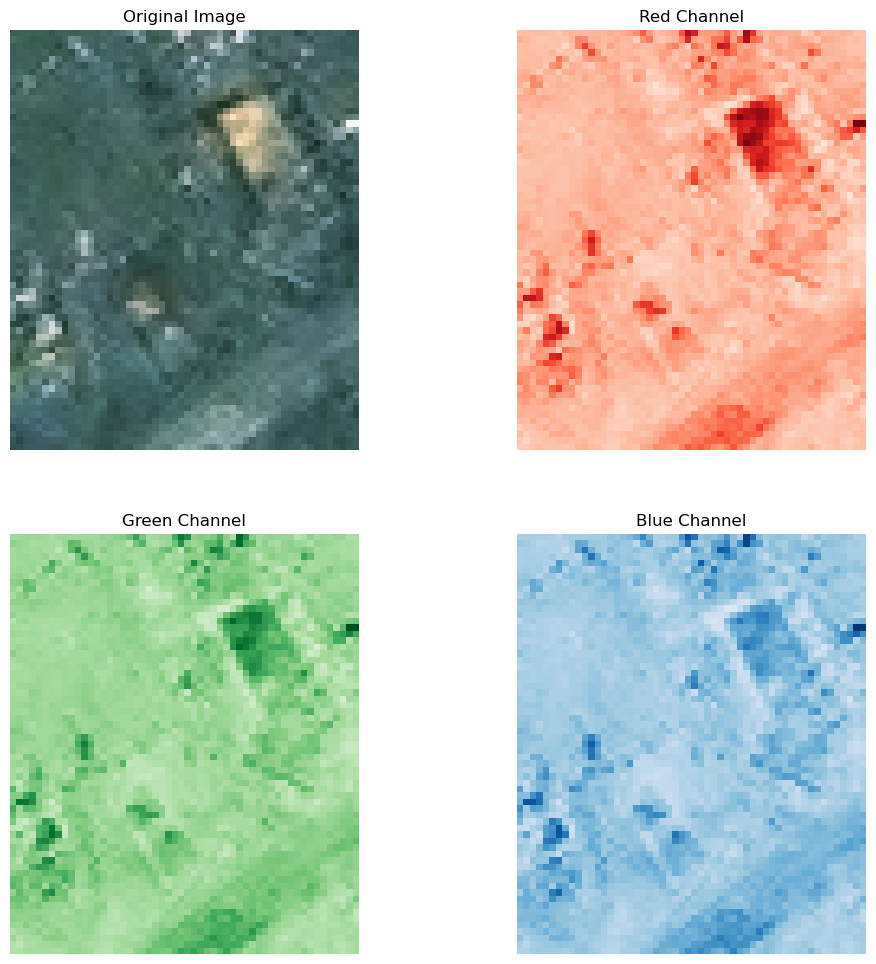

In [6]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Red Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img[:, :, 1], cmap="Greens", vmin=0, vmax=255)
plt.title("Green Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img[:, :, 2], cmap="Blues", vmin=0, vmax=255)
plt.title("Blue Channel")
plt.axis("off")

plt.show()

We can zoom in on just a pixel as well.

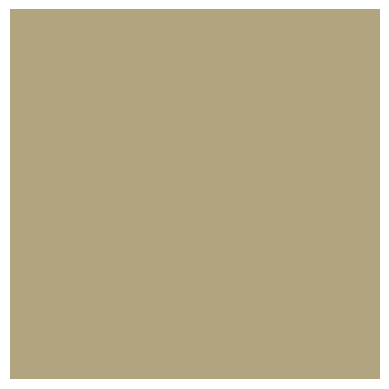

Pixel value: [177 165 128], coordinate: (15, 35)


In [7]:
coord = (15, 35)
pixel_value = img[coord[0], coord[1], :]
pixel_image = np.array([[pixel_value]])

plt.imshow(pixel_image)
plt.axis("off")
plt.show()

print(f"Pixel value: {pixel_value}, coordinate: {coord}")

# Extracting Edge and Texture Information

So far we have considered the **color** information in an image. However, other important aspects of an image are the edges and texture. 

Let us consider some popular feature processing methods for extracting edge and texture information. We will use the utilities provided in `feature_utils.py`.

In [8]:
from feature_utils import get_sobel_features, get_gabor_features, generate_gabor_kernel, get_local_binary_pattern

Let's try the Sobel Edge Filter. 

Read more about Sobel edge detection: https://en.wikipedia.org/wiki/Sobel_operator and https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html

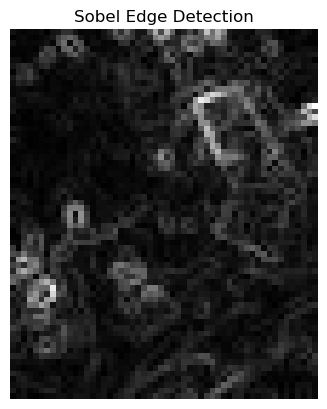

In [9]:
edges = get_sobel_features(img)
plt.imshow(edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

Now let's look at local binary patterns. 

Read more about LBP: https://en.wikipedia.org/wiki/Local_binary_patterns and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_local_binary_pattern.html

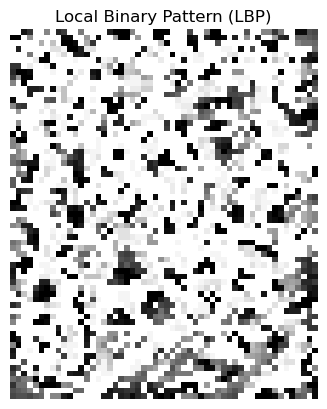

In [10]:
lbp = get_local_binary_pattern(img, radius=3)
plt.imshow(lbp, cmap="gray")
plt.axis("off")
plt.title("Local Binary Pattern (LBP)")
plt.show()

Another popular filter for image processing is the Gabor filter. The Gabor filters are a family of filters parametrized by orientation, frequency, bandwith, etc. Let's generate one such filter.

Read more about Gabor filters: https://en.wikipedia.org/wiki/Gabor_filter and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html

In [11]:
theta = 0
sigma = 1.0
frequency = 0.1

kernel = generate_gabor_kernel(theta, sigma, frequency)
gabor = get_gabor_features(img, kernel)

Let's visualize this filter (aka kernel) and the response of the image when we apply the filter. Concretely we are taking the convolution of the image with the filter. See https://en.wikipedia.org/wiki/Kernel_(image_processing) for more details.

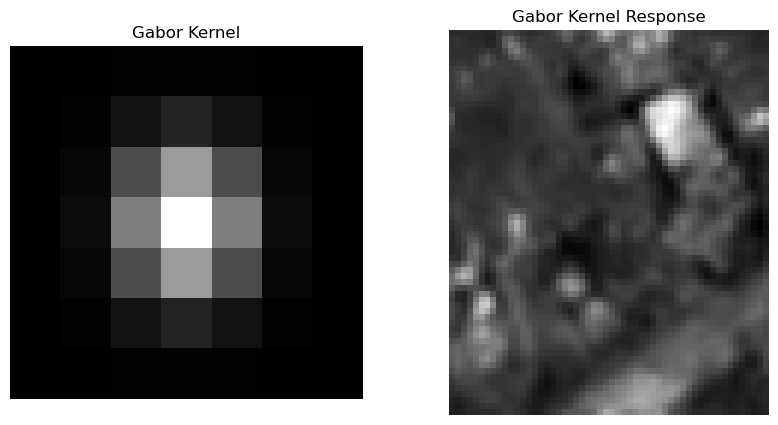

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot Gabor Kernel
axs[0].imshow(kernel, cmap="gray")
axs[0].axis("off")  # Remove axis
axs[0].set_title("Gabor Kernel")

# Plot Gabor Kernel Response
axs[1].imshow(gabor, cmap="gray")
axs[1].axis("off")  # Remove axis
axs[1].set_title("Gabor Kernel Response")

plt.show()

# EDA Report

Now that you have successfully been onboarded, the agency would like you to start performing some exploratory data analysis to build an initial understanding of the data. As part of the exploratory data analysis, the agency is interested in understanding certain aspects of the dataset better. Specifically, they are looking for:

Basic statistics about the dataset, such as the number of images per disaster type and the distribution of image sizes and damage labels.
Insights into useful image features for classifying images based on disaster type or damage level. Previous interns have found color information to be potentially useful. You are tasked with verifying this and exploring whether color features can effectively differentiate:

- midwest-flooding from socal-fire images.
- Damage levels 1 and 3 within the hurricane-matthew dataset.


In [13]:
num_images_per_disaster = {disaster: len(data[disaster]["images"]) for disaster in disaster_list}
image_sizes = {disaster: [img.shape for img in info['images']] for disaster, info in data.items()}
damage_labels_distribution = {disaster: np.unique(info['labels'], return_counts=True) for disaster, info in data.items()}

print("Number of images per disaster type:", num_images_per_disaster)

Number of images per disaster type: {'hurricane-matthew': 11151, 'socal-fire': 8380, 'midwest-flooding': 7004}


In [14]:
damage_labels_distribution = {
    disaster: {
        "label_0": np.sum(data[disaster]["labels"] == 0),
        "label_1": np.sum(data[disaster]["labels"] == 1),
        "label_2": np.sum(data[disaster]["labels"] == 2),
        "label_3": np.sum(data[disaster]["labels"] == 3),
    }
    for disaster in disaster_list
}

damage_labels_distribution

{'hurricane-matthew': {'label_0': 2631,
  'label_1': 5236,
  'label_2': 1544,
  'label_3': 1740},
 'socal-fire': {'label_0': 7204,
  'label_1': 69,
  'label_2': 43,
  'label_3': 1064},
 'midwest-flooding': {'label_0': 6734,
  'label_1': 114,
  'label_2': 97,
  'label_3': 59}}

In [15]:
image_sizes = {disaster: [img.shape for img in info['images']] for disaster, info in data.items()}


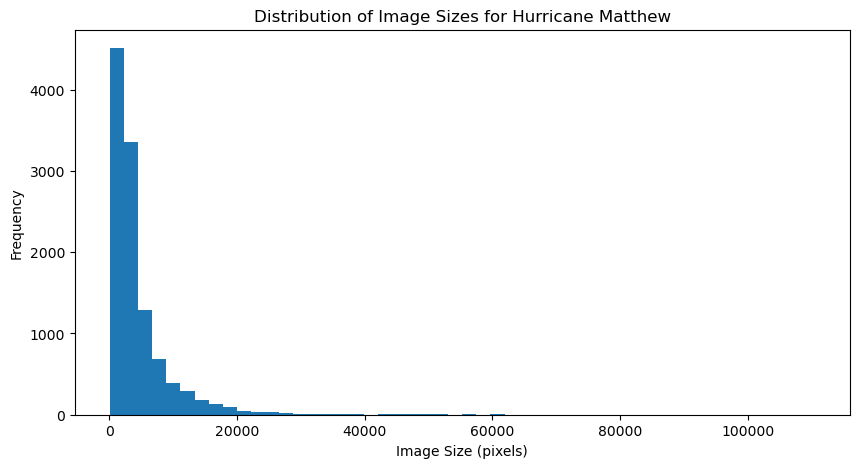

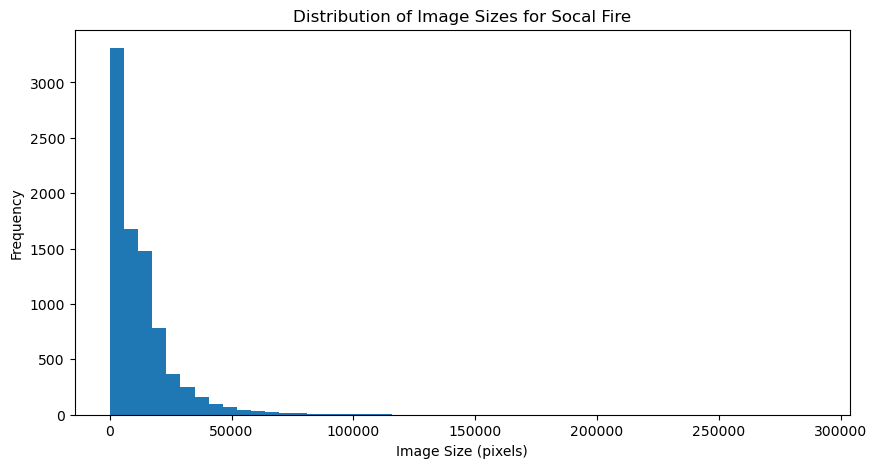

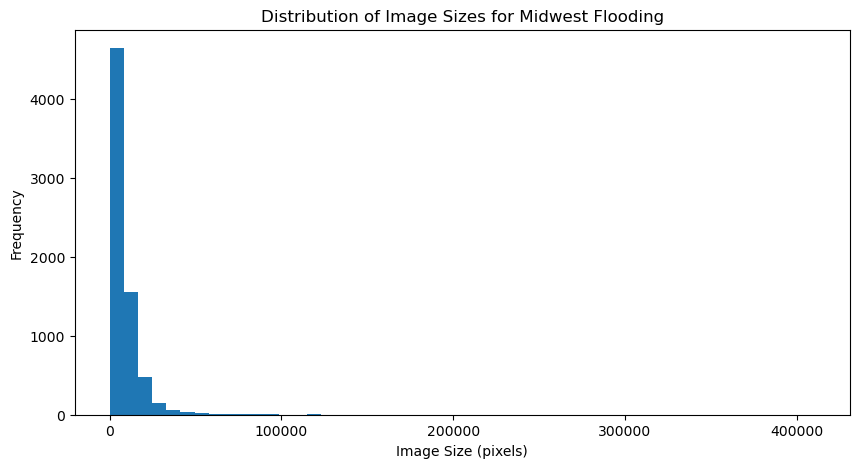

In [16]:
for disaster, info in data.items():
    plt.figure(figsize=(10, 5))
    sizes = [img.shape[0] * img.shape[1] for img in info['images']]
    plt.hist(sizes, bins=50)
    plt.title(f'Distribution of Image Sizes for {disaster.replace("-", " ").title()}')
    plt.xlabel('Image Size (pixels)')
    plt.ylabel('Frequency')
    plt.show()


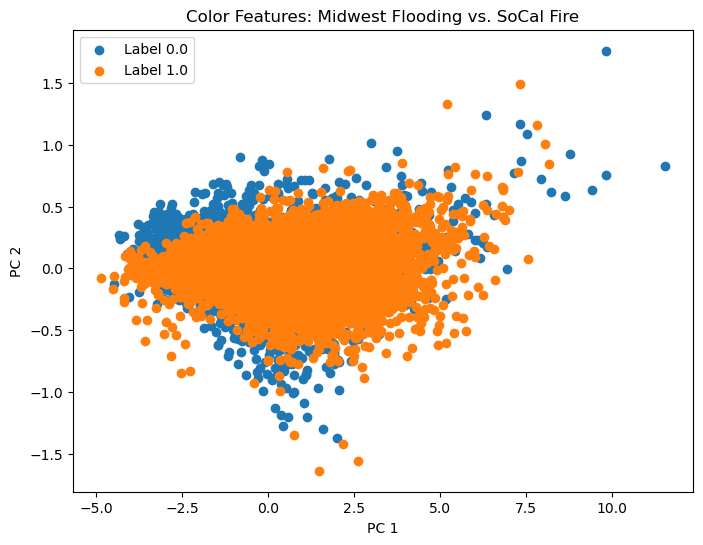

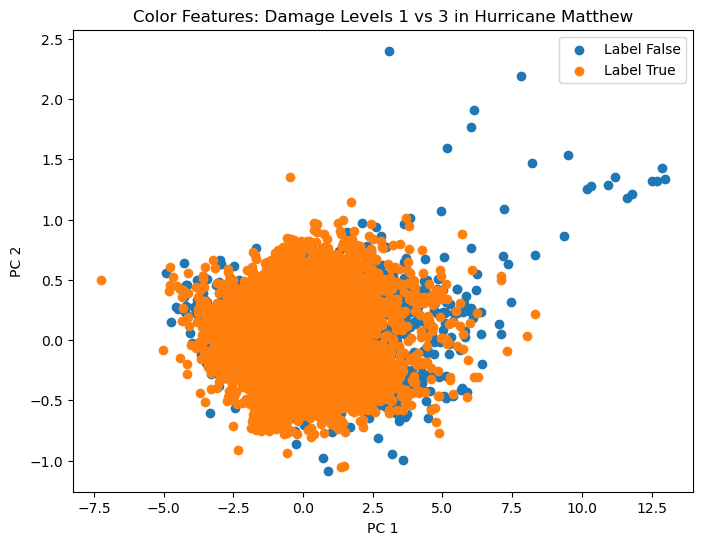

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def extract_color_features(images):
    features = np.array([img.mean(axis=(0, 1)) for img in images])
    return features

# Function to visualize features in 2D using PCA
def visualize_features(features, labels, title='Feature Visualization'):
    pca = PCA(n_components=2)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    features_pca = pca.fit_transform(features_scaled)
    
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        plt.scatter(features_pca[labels == label, 0], features_pca[labels == label, 1], label=f'Label {label}')
    plt.title(title)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.show()

midwest_flooding_features = extract_color_features(data['midwest-flooding']['images'])
socal_fire_features = extract_color_features(data['socal-fire']['images'])

# Visualize color features
visualize_features(np.vstack([midwest_flooding_features, socal_fire_features]),
                   np.concatenate([np.zeros(len(midwest_flooding_features)), np.ones(len(socal_fire_features))]),
                   title='Color Features: Midwest Flooding vs. SoCal Fire')

hurricane_matthew_features = extract_color_features(data['hurricane-matthew']['images'])
hurricane_matthew_labels = data['hurricane-matthew']['labels']
visualize_features(hurricane_matthew_features,
                   (hurricane_matthew_labels == 1) | (hurricane_matthew_labels == 3),
                   title='Color Features: Damage Levels 1 vs 3 in Hurricane Matthew')

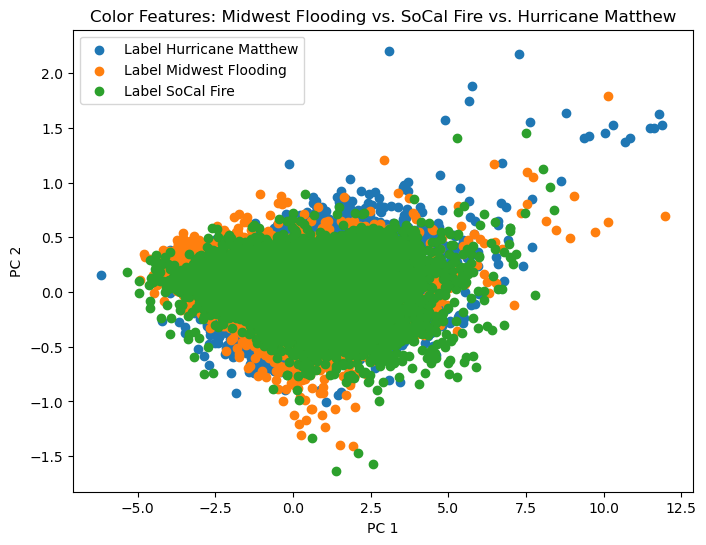

In [18]:
midwest_flooding_features = extract_color_features(data['midwest-flooding']['images'])
socal_fire_features = extract_color_features(data['socal-fire']['images'])
hurricane_matthew_features = extract_color_features(data['hurricane-matthew']['images'])

all_features = np.vstack([midwest_flooding_features, socal_fire_features, hurricane_matthew_features])
all_labels = np.concatenate([
    np.full(len(midwest_flooding_features), 'Midwest Flooding'),
    np.full(len(socal_fire_features), 'SoCal Fire'),
    np.full(len(hurricane_matthew_features), 'Hurricane Matthew')
])

visualize_features(all_features, all_labels, title='Color Features: Midwest Flooding vs. SoCal Fire vs. Hurricane Matthew')


## Checkpoint 2

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import torch
import pickle
import time
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from skimage.exposure import adjust_gamma
import random


print("Imported everything!")

2024-05-11 17:41:04.278140: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Imported everything!


In [20]:
disasters = list(num_images_per_disaster.keys())
num_images = list(num_images_per_disaster.values())

df = pd.DataFrame({'Disaster Type': disasters, 'Number of Images': num_images})
df

,Disaster Type,Number of Images
0,hurricane-matthew,11151
1,socal-fire,8380
2,midwest-flooding,7004


In [21]:
import pandas as pd
disaster_list = ["midwest-flooding", "socal-fire", "hurricane-matthew"]

img_dimensions = {'Disaster': [], 'Width': [], 'Height': []}
for disaster in disaster_list:
    images = data[disaster]['images']
    for img in images:
        height, width = img.shape[:2]
        img_dimensions['Disaster'].append(disaster)
        img_dimensions['Width'].append(width)
        img_dimensions['Height'].append(height)
dim_df = pd.DataFrame(img_dimensions)

img_widths = []
img_heights = []

for disaster in disaster_list:
    for img in data[disaster]['images']:
        height, width = img.shape[:2]
        img_dimensions['Disaster'].append(disaster)
        img_dimensions['Width'].append(width)
        img_dimensions['Height'].append(height)


In [22]:
img_results = []
for disaster in disaster_list:
    print(f"Loading train images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split="train")
    labels = get_labels(data_dir, disaster, split="train")
    print(f"Number of images loaded for {disaster}: {len(images)}")  # Debugging output

    for img, label in zip(images, labels):
        img = convert_dtype([img], dtype=np.float32)[0]

        # Extract Sobel features inside the loop
        sobel_features = get_sobel_features(img)
        sobel_mean = np.mean(sobel_features)

        lbp_features = get_local_binary_pattern(img)
        lbp_mean = np.mean(lbp_features)

        theta, sigma, frequency = 0, 1.0, 0.1
        kernel = generate_gabor_kernel(theta, sigma, frequency)
        gabor_features = get_gabor_features(img, kernel)
        gabor_mean = np.mean(gabor_features)

        height, width = img.shape[:2]
        color_features = extract_color_features([img])
        color_mean = np.mean(color_features)
        
        # Append each image's results to the results list inside the loop
        img_results.append({
            'disaster_type': disaster,
            'label': label,
            'lbp_features': lbp_features.flatten(),
            'lbp_mean': lbp_mean,
            'height': height,
            'width': width,
            'sobel_features': sobel_features.flatten(),
            'sobel_mean': sobel_mean,
            'gabor_features': gabor_features.flatten(),
            'gabor_mean': gabor_mean,
            'color_features': color_features.flatten(),
            'color_mean': color_mean
        })

features_df = pd.DataFrame(img_results)
print(features_df)
features_df


Loading train images and labels for midwest-flooding dataset...
Number of images loaded for midwest-flooding: 7004
Loading train images and labels for socal-fire dataset...
Number of images loaded for socal-fire: 8380
Loading train images and labels for hurricane-matthew dataset...
Number of images loaded for hurricane-matthew: 11151
           disaster_type  label  \
0       midwest-flooding      0   
1       midwest-flooding      0   
2       midwest-flooding      0   
3       midwest-flooding      0   
4       midwest-flooding      1   
...                  ...    ...   
26530  hurricane-matthew      3   
26531  hurricane-matthew      0   
26532  hurricane-matthew      2   
26533  hurricane-matthew      3   
26534  hurricane-matthew      0   

                                            lbp_features  lbp_mean  height  \
0      [3.0, 4.0, 1.0, 9.0, 1.0, 5.0, 4.0, 9.0, 3.0, ...  4.999729      42   
1      [1.0, 2.0, 5.0, 2.0, 0.0, 1.0, 5.0, 2.0, 0.0, ...  5.092382     163   
2      [3

,disaster_type,label,lbp_features,lbp_mean,height,width,sobel_features,sobel_mean,gabor_features,gabor_mean,color_features,color_mean
0,midwest-flooding,0,"[3.0, 4.0, 1.0, 9.0, 1.0, 5.0, 4.0, 9.0, 3.0, ...",4.999729,42,176,"[1.9310894, 2.3003438, 2.4448397, 0.73644227, ...",6.062900,"[89.62758, 93.20821, 94.6147, 95.26778, 94.636...",94.742393,"[99.10146, 119.19278, 126.047485]",114.780579
1,midwest-flooding,0,"[1.0, 2.0, 5.0, 2.0, 0.0, 1.0, 5.0, 2.0, 0.0, ...",5.092382,163,189,"[8.255579, 11.5374365, 1.3714603, 6.8906016, 2...",5.703377,"[86.53176, 81.9803, 81.03239, 83.58418, 86.084...",88.058601,"[92.03259, 111.545815, 109.82562]",104.468010
2,midwest-flooding,0,"[3.0, 2.0, 9.0, 2.0, 5.0, 4.0, 1.0, 1.0, 5.0, ...",4.920910,72,72,"[1.4549754, 1.8211148, 3.2244532, 2.4071653, 1...",6.637829,"[72.97418, 76.98753, 75.912025, 74.35369, 73.8...",73.460007,"[70.65259, 95.39352, 86.44464]",84.163582
3,midwest-flooding,0,"[3.0, 2.0, 9.0, 2.0, 2.0, 5.0, 9.0, 1.0, 3.0, ...",4.817029,46,48,"[2.8563213, 3.6112854, 4.8242826, 7.450431, 2....",12.801187,"[111.498604, 105.42903, 104.69679, 105.96832, ...",111.867287,"[122.41078, 140.64539, 133.83604]",132.297409
4,midwest-flooding,1,"[0.0, 3.0, 2.0, 1.0, 5.0, 2.0, 5.0, 0.0, 9.0, ...",5.116468,80,63,"[7.9133463, 13.367639, 6.295309, 3.244873, 3.0...",6.984155,"[72.05284, 72.742516, 69.70303, 67.62218, 66.2...",60.302776,"[49.225395, 82.20039, 58.194443]",63.206741
...,...,...,...,...,...,...,...,...,...,...,...,...
26530,hurricane-matthew,3,"[0.0, 1.0, 9.0, 0.0, 1.0, 2.0, 1.0, 1.0, 5.0, ...",4.494991,55,49,"[4.5276814, 5.412517, 2.891634, 3.3721428, 8.9...",12.726764,"[94.357605, 104.59495, 103.825455, 100.93791, ...",86.127434,"[82.25009, 111.01595, 111.28535]",101.517128
26531,hurricane-matthew,0,"[2.0, 3.0, 9.0, 0.0, 3.0, 9.0, 1.0, 1.0, 4.0, ...",4.682500,80,35,"[2.2124112, 3.778204, 2.0710487, 2.7903037, 6....",7.934089,"[68.884995, 70.39559, 71.12326, 70.77784, 68.7...",80.257507,"[73.34571, 105.58179, 92.26857]",90.398682
26532,hurricane-matthew,2,"[1.0, 1.0, 0.0, 1.0, 3.0, 2.0, 9.0, 9.0, 1.0, ...",4.891156,49,45,"[8.366087, 13.174756, 13.57375, 9.147998, 8.46...",18.342148,"[99.119576, 79.39467, 77.13061, 75.888374, 73....",84.132668,"[87.19456, 108.28299, 90.125626]",95.201050
26533,hurricane-matthew,3,"[3.0, 9.0, 2.0, 1.0, 1.0, 2.0, 5.0, 1.0, 9.0, ...",4.955435,40,46,"[12.030185, 6.552926, 14.067722, 15.594065, 19...",8.083752,"[71.134895, 77.49112, 75.069786, 69.21864, 63....",61.202641,"[53.797283, 81.15978, 70.24946]",68.402168


## TASK A: DISASTER TYPE CLASSIFICATION
The agency consists of different subdivisions for assisting with different disaster types, e.g., fires, floods, etc. In the event of a disaster, the agency mounts its response effort by first assessing the type of disaster and then requesting the appropriate subdivision to assist with the disaster.

Your task is to assist the agency with making this initial call quickly by automatically classifying images based on the disaster scenario. Specifically, your role will be to build a classifier that can distinguish images from the midwest-flooding disaster and the socal-fire disaster.

To assess your performance, please submit predictions for the test_images_flooding-fire.npz images. This should be in a csv file test_images_flooding-fire_predictions.csv consisting of a single column named pred, with a 0 to indicate a midwest-flooding prediction and a 1 to indicate a socal-fire prediction. The prediction in row i should correspond to the ith image.TASK A: DISASTER TYPE CLASSIFICATION
The agency consists of different subdivisions for assisting with different disaster types, e.g., fires, floods, etc. In the event of a disaster, the agency mounts its response effort by first assessing the type of disaster and then requesting the appropriate subdivision to assist with the disaster.

Your task is to assist the agency with making this initial call quickly by automatically classifying images based on the disaster scenario. Specifically, your role will be to build a classifier that can distinguish images from the midwest-flooding disaster and the socal-fire disaster.

To assess your performance, please submit predictions for the test_images_flooding-fire.npz images. This should be in a csv file test_images_flooding-fire_predictions.csv consisting of a single column named pred, with a 0 to indicate a midwest-flooding prediction and a 1 to indicate a socal-fire prediction. The prediction in row i should correspond to the ith image.

In [23]:
# filter out the disaster type for Task A 
df_a = features_df[(features_df['disaster_type'] =='midwest-flooding') | (features_df['disaster_type'] =='socal-fire')]
features = ['sobel_mean', 'lbp_mean', 'gabor_mean', 'color_mean', 'width', 'height']
# Filter out the features
X = df_a[features]
y = df_a['disaster_type'].apply(lambda x: 0 if x == 'midwest-flooding' else 1)


# Normalize the feature vectors and split the data into training and validation sets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
# initialize and train the model

model = LogisticRegression(max_iter=13000)
model.fit(X_train, y_train)

# output of the validation accuracy
val_predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.9548261293467664


In [25]:
# Load test data

test_data = np.load('test_images_flooding-fire.npz')
test_images = [test_data[key] for key in test_data.keys()]
test_results = []

for img_array in test_images:
    img = img_array.astype(np.float32)
    sobel_features = get_sobel_features(img)
    sobel_mean = np.mean(sobel_features)
    lbp_features = get_local_binary_pattern(img)
    lbp_mean = np.mean(lbp_features)
    
    theta, sigma, frequency = 0, 1.0, 0.1
    kernel = generate_gabor_kernel(theta, sigma, frequency)
    gabor_features = get_gabor_features(img, kernel)
    gabor_mean = np.mean(gabor_features)

    height, width = img.shape[:2]
    color_features = extract_color_features([img])
    color_mean = np.mean(color_features)

    
    test_results.append({
            'disaster_type': disaster,
            'label': label,
            'lbp_features': lbp_features.flatten(),
            'lbp_mean': lbp_mean,
            'height': height,
            'width': width,
            'sobel_features': sobel_features.flatten(),
            'sobel_mean': sobel_mean,
            'gabor_features': gabor_features.flatten(),
            'gabor_mean': gabor_mean,
            'color_features': color_features.flatten(),
            'color_mean': color_mean
        })
test_results_df = pd.DataFrame(test_results)
test_results_df.head



<bound method NDFrame.head of           disaster_type  label  \
0     hurricane-matthew      0   
1     hurricane-matthew      0   
2     hurricane-matthew      0   
3     hurricane-matthew      0   
4     hurricane-matthew      0   
...                 ...    ...   
3842  hurricane-matthew      0   
3843  hurricane-matthew      0   
3844  hurricane-matthew      0   
3845  hurricane-matthew      0   
3846  hurricane-matthew      0   

                                           lbp_features  lbp_mean  height  \
0     [3.0, 3.0, 5.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...  4.710526      19   
1     [9.0, 1.0, 1.0, 1.0, 0.0, 9.0, 2.0, 2.0, 1.0, ...  5.084010     132   
2     [1.0, 0.0, 9.0, 5.0, 4.0, 3.0, 1.0, 0.0, 1.0, ...  4.901639      25   
3     [0.0, 4.0, 5.0, 2.0, 0.0, 3.0, 2.0, 4.0, 5.0, ...  4.855577      33   
4     [1.0, 2.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 1.0, ...  4.642183      86   
...                                                 ...       ...     ...   
3842  [0.0, 9.0, 1.0, 

In [26]:
# StandardScaler and model defined per training setup
X_test = test_results_df[features].values
X_test_df = pd.DataFrame(X_test, columns=['sobel_mean', 'lbp_mean', 'gabor_mean', 'color_mean', 'width', 'height'])


X_normalized = scaler.transform(X_test_df)
test_predictions = model.predict(X_normalized)
predictions_df = pd.DataFrame(test_predictions, columns=['Prediction'])

# Output the predictions to a CSV file
output_file_path = "test_images_flooding-fire_predictions.csv"
predictions_df.to_csv(output_file_path, index=False)

print("Test predictions saved to:", output_file_path)


Test predictions saved to: test_images_flooding-fire_predictions.csv


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## K-Fold Validation for Task A

In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
accuracy_scores = []
actual_labels = []
predicted_labels =[]

In [30]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the validation daa
    y_pred = model.predict(X_val)
    
    # accuracy calculation
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)
    
    # Store actual + predicted labels
    actual_labels.extend(y_val)
    predicted_labels.extend(y_pred)

# mean and standard deviation of the accuracy
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print(classification_report(actual_labels, predicted_labels, target_names=['Midwest-Flooding', 'SoCal-Fire']))

Mean Accuracy: 0.9526133741975047
Standard Deviation of Accuracy: 0.0027488035032062225
                  precision    recall  f1-score   support

Midwest-Flooding       0.96      0.94      0.95      7004
      SoCal-Fire       0.95      0.97      0.96      8380

        accuracy                           0.95     15384
       macro avg       0.95      0.95      0.95     15384
    weighted avg       0.95      0.95      0.95     15384



## TASK B: DAMAGE LEVEL CLASSIFICATION
The agency needs to know how severe a disaster is in order to allocate resources for a response effectively. The agency is especially concerned with human lives and uses building damage as an important metric for disaster severity.

Your task is to assist the agency by automatically detecting the building damage level after a disaster. Specifically, create a damage level classifier for the hurricane-matthew disaster.

To assess your performance, please submit predictions for the test_images_hurricane-matthew.npz images. This should be in a CSV file test_images_hurricane-matthew_predictions.csv consisting of a single column named pred, with a 0-3 prediction of the damage level. The prediction in row i should correspond to the ith image.



In [31]:
# Filter the Dataframe specifically for the hurricane matthew as the disaster type
df_b = features_df[(features_df['disaster_type'] == 'hurricane-matthew')]


In [32]:
# Filter out the features
features_b = ['sobel_mean', 'lbp_mean', 'gabor_mean', 'color_mean', 'width', 'height']
X_b = df_b[features]
y_b = y_b = df_b['label'].values

df_b.head()



,disaster_type,label,lbp_features,lbp_mean,height,width,sobel_features,sobel_mean,gabor_features,gabor_mean,color_features,color_mean
15384,hurricane-matthew,3,"[3.0, 4.0, 1.0, 9.0, 0.0, 1.0, 5.0, 2.0, 2.0, ...",4.931624,65,54,"[8.780428, 4.093463, 2.5983806, 4.4233737, 4.1...",14.569633,"[69.64084, 70.26716, 70.39187, 70.20955, 70.06...",81.010612,"[75.70228, 105.27578, 101.084045]",94.020699
15385,hurricane-matthew,0,"[2.0, 5.0, 4.0, 2.0, 3.0, 3.0, 9.0, 2.0, 3.0, ...",4.702630,67,105,"[6.0609226, 6.4567018, 5.8585153, 9.83377, 29....",9.584824,"[117.57879, 134.14302, 136.76431, 135.9622, 12...",92.084755,"[88.4516, 119.42288, 110.24833]",106.040932
15386,hurricane-matthew,1,"[2.0, 4.0, 5.0, 4.0, 0.0, 9.0, 3.0, 2.0, 9.0, ...",4.952381,54,56,"[7.8057847, 11.089824, 12.990838, 20.428654, 1...",17.071079,"[81.89116, 86.76233, 87.61375, 91.107445, 96.1...",98.315758,"[111.97156, 122.16071, 119.04332]",117.725197
15387,hurricane-matthew,0,"[0.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 1.0, ...",4.878325,114,124,"[36.96585, 57.97567, 31.06829, 13.523828, 5.82...",6.611919,"[117.33958, 114.29235, 99.00635, 90.05382, 86....",99.939568,"[96.9797, 128.50397, 127.72538]",117.736351
15388,hurricane-matthew,2,"[1.0, 0.0, 1.0, 1.0, 1.0, 3.0, 5.0, 4.0, 0.0, ...",4.397566,58,51,"[23.126715, 16.672756, 8.979006, 7.197319, 14....",16.538330,"[83.53239, 93.17831, 95.12369, 95.15754, 94.45...",84.787422,"[87.17985, 108.77891, 96.311356]",97.423370


In [33]:
# Normalize the feature vectors and split the data into training and validation sets
scaler_b = StandardScaler()
X_scaled_b = scaler.fit_transform(X_b)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_scaled_b, y_b, test_size=0.2, random_state=42)

In [34]:
# initialize and train the model for Task B

model = LogisticRegression(max_iter=13000)
model.fit(X_train_b, y_train_b)

# output of the validation accuracy
val_predictions_b = model.predict(X_val_b)
accuracy_b = accuracy_score(y_val_b, val_predictions_b)
print("Validation Accuracy Task B:", accuracy_b)


Validation Accuracy Task B: 0.5558045719408337


In [35]:
# Load test data

test_data = np.load('test_images_hurricane-matthew.npz')
test_images = [test_data[key] for key in test_data.keys()]
test_results_b = []

for img_array in test_images:
    img = img_array.astype(np.float32)
    sobel_features = get_sobel_features(img)
    sobel_mean = np.mean(sobel_features)
    lbp_features = get_local_binary_pattern(img)
    lbp_mean = np.mean(lbp_features)
    
    theta, sigma, frequency = 0, 1.0, 0.1
    kernel = generate_gabor_kernel(theta, sigma, frequency)
    gabor_features = get_gabor_features(img, kernel)
    gabor_mean = np.mean(gabor_features)

    height, width = img.shape[:2]
    color_features = extract_color_features([img])
    color_mean = np.mean(color_features)

    
    test_results_b.append({
        'disaster_type': disaster,
        'label': label,
        'lbp_features': lbp_features.flatten(),
        'lbp_mean': lbp_mean,
        'height': height,
        'width': width,
        'sobel_features': sobel_features.flatten(),
        'sobel_mean': sobel_mean,
        'gabor_features': gabor_features.flatten(),
        'gabor_mean': gabor_mean,
        'color_features': color_features.flatten(),
        'color_mean': color_mean
        })
test_results_b_df = pd.DataFrame(test_results_b)
test_results_b_df.head



<bound method NDFrame.head of           disaster_type  label  \
0     hurricane-matthew      0   
1     hurricane-matthew      0   
2     hurricane-matthew      0   
3     hurricane-matthew      0   
4     hurricane-matthew      0   
...                 ...    ...   
2783  hurricane-matthew      0   
2784  hurricane-matthew      0   
2785  hurricane-matthew      0   
2786  hurricane-matthew      0   
2787  hurricane-matthew      0   

                                           lbp_features  lbp_mean  height  \
0     [2.0, 4.0, 3.0, 2.0, 9.0, 1.0, 0.0, 1.0, 9.0, ...  4.574303     157   
1     [3.0, 1.0, 9.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, ...  4.503125      64   
2     [1.0, 2.0, 9.0, 1.0, 0.0, 2.0, 9.0, 2.0, 2.0, ...  4.431393      37   
3     [2.0, 1.0, 0.0, 9.0, 5.0, 9.0, 9.0, 0.0, 9.0, ...  4.686973      58   
4     [3.0, 1.0, 4.0, 5.0, 2.0, 0.0, 5.0, 9.0, 0.0, ...  4.686264      62   
...                                                 ...       ...     ...   
2783  [3.0, 4.0, 3.0, 

In [36]:
# StandardScaler and model defined per training setup
features_b = ['sobel_mean', 'lbp_mean', 'gabor_mean', 'color_mean', 'width', 'height']
X_test_b = test_results_df[features_b].values
X_test_b_df = pd.DataFrame(X_test_b, columns=['sobel_mean', 'lbp_mean', 'gabor_mean', 'color_mean', 'width', 'height'])


X_normalized = scaler.transform(X_test_b_df)
test_predictions = model.predict(X_normalized)
predictions_b_df = pd.DataFrame(test_predictions, columns=['Prediction'])

# Output the predictions to a CSV file
output_file_path = "test_images_hurricane-matthew_predictions.csv"
predictions_b_df.to_csv(output_file_path, index=False)

print("Test predictions saved to:", output_file_path)


Test predictions saved to: test_images_hurricane-matthew_predictions.csv


## K-Fold Validation Task B

In [37]:
# Normalize the feature vectors and split the data into training and validation sets
scaler_b = StandardScaler()
X_scaled_b = scaler.fit_transform(X_b)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_scaled_b, y_b, test_size=0.2, random_state=42)

In [38]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
actual_labels_b = []
predicted_labels_b = []

for train_index, val_index in kf.split(X_scaled_b):
    X_train_b, X_val_b = X_scaled_b[train_index], X_scaled_b[val_index]
    y_train_b, y_val_b = y_b[train_index], y_b[val_index]
    
    # Train the model
    model.fit(X_train_b, y_train_b)
    
    # Predict the validation data
    y_pred_b = model.predict(X_val_b)
    
    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_val_b, y_pred_b)
    accuracy_scores.append(accuracy)
    
    # Store actual + predicted labels
    actual_labels_b.extend(y_val_b)
    predicted_labels_b.extend(y_pred_b)

# Calculate mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

# Make sure the number of target names matches the unique classes in actual_labels_b
unique_classes = np.unique(actual_labels_b)
target_names = [f'Class {i}' for i in range(len(unique_classes))]

print(classification_report(actual_labels_b, predicted_labels_b, target_names=target_names))


Mean Accuracy: 0.5655106901729201
Standard Deviation of Accuracy: 0.008996846243352835
              precision    recall  f1-score   support

     Class 0       0.49      0.31      0.38      2631
     Class 1       0.59      0.85      0.70      5236
     Class 2       0.33      0.03      0.06      1544
     Class 3       0.53      0.56      0.54      1740

    accuracy                           0.57     11151
   macro avg       0.49      0.44      0.42     11151
weighted avg       0.52      0.57      0.51     11151



# Additional Attempts: Task A

In [39]:
def timeit(f):
    def timed(*args, **kw):
        ts = time.time()
        result = f(*args, **kw)
        te = time.time()
        print(f'func: {f.__name__} took: {te-ts:.4f} sec')
        return result
    return timed

In [40]:
def load_dataset(path):
    with open(path, 'rb') as f:
        train_data, test_data = pickle.load(f)
    
    X_train = torch.tensor(train_data[0], dtype=torch.float).unsqueeze(1)
    y_train = torch.tensor(train_data[1], dtype=torch.long)
    X_test = torch.tensor(test_data[0], dtype=torch.float).unsqueeze(1)
    y_test = torch.tensor(test_data[1], dtype=torch.long)
    return X_train, y_train, X_test, y_test

In [41]:
disaster_list = ["midwest-flooding", "socal-fire"]
split = 'train'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DeepCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.ModuleList([
            nn.Conv2d(3, 6, kernel_size=5),
            nn.Conv2d(6, 16, kernel_size=5),
        ])
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = None  # Placeholder, will be initialized later
        self.fc2 = nn.Linear(84, 4)
        self.activation = nn.ReLU()

    def initialize_fc1(self, input_shape):
        dummy_input = torch.zeros(input_shape).unsqueeze(0)  # Add batch dimension
        for i in range(2):
            dummy_input = self.pool(self.activation(self.conv[i](dummy_input)))
        flattened_size = dummy_input.numel()
        self.fc1 = nn.Linear(flattened_size, 84)

    def forward(self, x):
        if self.fc1 is None:
            self.initialize_fc1(x.shape[1:])

        for i in range(2):
            x = self.pool(self.activation(self.conv[i](x)))
        x = x.reshape(x.size(0), -1)
        x = self.activation(self.fc1(x))
        x = nn.Softmax(dim=-1)(self.fc2(x))
        return x


def load_and_preprocess_images(data_dir, disaster_list, target_size, split="train"):
    processed_images = []
    labels = []

    for disaster in disaster_list:
        image_path = os.path.join(data_dir, disaster, f"{split}_images.npz")
        label_path = os.path.join(data_dir, disaster, f"{split}_labels.npy")
        disaster_label = 1 if disaster == "socal-fire" else 0

        images = load_images(image_path)
        labels_data = np.load(label_path)
        labels_data[:] = disaster_label

        for img in tqdm(images, desc=f"Processing {disaster} images"):
            img_resized = resize(img, target_size, mode='constant', anti_aliasing=True)
            img_resized = (img_resized * 255).astype(np.uint8)  # Convert type
            img_augmented = adjust_gamma(img_resized, gamma=0.95)  # Slight gamma correction
            processed_images.append(img_augmented)
            labels.append(disaster_label)

    return np.array(processed_images), np.array(labels)


def load_disaster_data(data_dir, disaster_list, split):
    data = {}
    for disaster in disaster_list:
        print(f"Loading {split} images and labels for {disaster} dataset...")
        images = get_images(data_dir, disaster, split=split)
        labels = get_labels(data_dir, disaster, split=split)
        data[disaster] = {"images": images, "labels": labels}
    return data


@timeit

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return image, label
    
    

target_size = (224, 224)

X, y = load_and_preprocess_images(data_dir, disaster_list, target_size, split)

dataset = CustomDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

#for batch_images, batch_labels in dataloader:
#    print(f"Batch images shape: {batch_images.shape}")
#    print(f"Batch labels: {batch_labels}")
#plot_label_distribution(y)


#k_fold_training(DeepCNN, dataset, k_folds=5, epochs=10, batch_size=32)




Processing midwest-flooding images:   0%|          | 0/7004 [00:00<?, ?it/s]

Processing socal-fire images:   0%|          | 0/8380 [00:00<?, ?it/s]

func: CustomDataset took: 0.0000 sec


### K-Fold Random Forest Classifier

In [42]:
def k_fold_random_forest(dataset, k_folds=5):
    # Extracting images and labels from the dataset assuming it's a list of tuples (image, label)
    X = np.array([sample[0].reshape(-1) for sample in dataset])  # Flatten images for RF
    y = np.array([sample[1] for sample in dataset])

    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classifier = RandomForestClassifier(n_estimators=250, max_depth=15, random_state=42)  # Correct parameter
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"Fold accuracy: {accuracy:.3f}")

    average_accuracy = np.mean(accuracies)
    print(f"Average K-Fold Accuracy: {average_accuracy:.3f}")

# Example dataset (simulated)
dataset = [(np.random.rand(224, 224, 3), 0) for _ in range(50)] + [(np.random.rand(224, 224, 3), 1) for _ in range(50)]
k_fold_random_forest(dataset, k_folds=5)


Fold accuracy: 0.400
Fold accuracy: 0.300
Fold accuracy: 0.500
Fold accuracy: 0.550
Fold accuracy: 0.500
Average K-Fold Accuracy: 0.450


# Additional Attempts Part 2: Task A

In [43]:
#task_A_labels_CNN = np.concatenate((fire_LBL , flood_LBL))

#len(fire_LBL) + len(flood_LBL)

In [44]:
# task_a_images_preprocessed
#len(task_A_labels_CNN)

#fire_CNN = task_a_images_preprocessed['socal-fire']['images']
#flood_CNN = task_a_images_preprocessed['midwest-flooding']['images']

#task_A_CNN = fire_CNN + flood_CNN
#assert len(task_A_CNN) == (len(fire_LBL) + len(flood_LBL)) # Making sure we have the same amount of images and labels

In [45]:
#task_A_labels_CNN = torch.tensor(task_A_labels_CNN)
#task_A_images_CNN = torch.stack(task_A_CNN)

#indices = torch.randperm(len(task_A_images_CNN))
#task_A_images_CNN_shuffled = task_A_images_CNN[indices]
#task_A_labels_CNN_shuffled = task_A_labels_CNN[indices]

#assert len(task_A_images_CNN_shuffled) == len(task_A_labels_CNN_shuffled)

In [46]:
# Split the data into training and testing sets
split_ratio = 0.66
split_index = int(len(task_A_images_CNN_shuffled) * split_ratio)

X_train = task_A_images_CNN_shuffled[:split_index]
y_train = task_A_labels_CNN_shuffled[:split_index]

X_test = task_A_images_CNN_shuffled[split_index:]
y_test = task_A_labels_CNN_shuffled[split_index:]

# Confirm the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

NameError: name 'task_A_images_CNN_shuffled' is not defined

In [ ]:
class DeepCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.ModuleList([
            nn.Conv2d(3, 6, kernel_size=5),
            nn.Conv2d(6, 16, kernel_size=5),
        ])
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.ModuleList([
            nn.Linear(16*53*53, 84),  
            nn.Linear(84, 4)
        ])
        self.activation = nn.ReLU()

    def forward(self, x):
        for i in range(2):
            x = self.pool(self.activation(self.conv[i](x)))
        x = x.view(x.size(0), -1)  
        x = self.activation(self.fc[0](x))
        x = nn.Softmax(dim=-1)(self.fc[1](x))
        return x

net = DeepCNN()


KFoldCrossValidation(DeepCNN, 3, X_train, y_train, X_test, y_test, 
                     opt_method='adam', learning_rate=1e-3, 
                     batch_size=128, epoch=30)

# Additional Attempts: Task B

In [ ]:
task_b_images = {}
task_b_label  = ['hurricane-matthew']

for disaster in task_b_label:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    # images = rgb2gray(images)
    task_b_images[disaster] = {"images": images , "labels":labels}
    


In [ ]:
# Concatenate preprocessed images and labels for task B
task_b_images = task_b_images_preprocessed['hurricane-matthew']['images']
task_b_labels = task_b_images_preprocessed['hurricane-matthew']['labels']

# Convert images and labels to PyTorch tensors
task_b_images_tensor = torch.stack(task_b_images)
task_b_labels_tensor = torch.tensor(task_b_labels)

# Shuffle the data
indices = torch.randperm(len(task_b_images_tensor))
task_b_images_shuffled = task_b_images_tensor[indices]
task_b_labels_shuffled = task_b_labels_tensor[indices]

len(task_b_images_shuffled) == len(task_b_labels_shuffled)

In [ ]:
# Split the data into training and testing sets
split_ratio = 0.66
split_index = int(len(task_b_images_shuffled) * split_ratio)

X_train = task_b_images_shuffled[:split_index]
y_train = task_b_labels_shuffled[:split_index]

X_test = task_b_images_shuffled[split_index:]
y_test = task_b_labels_shuffled[split_index:]

# Confirm the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print(f'func: {f.__name__} took: {te-ts:.4f} sec')
        return result

    return timed

class Trainer:
    
    def __init__(self, model, opt_method, learning_rate, batch_size, epoch, l2 , class_weights=None):
        self.model = model
        if opt_method == "sgdm":
            self.optimizer = torch.optim.SGD(model.parameters(), learning_rate, momentum=0.9)
        elif opt_method == "adam":
            self.optimizer = torch.optim.Adam(model.parameters(), learning_rate, weight_decay=l2)
        else:
            raise NotImplementedError("This optimization is not supported")
        
        self.epoch = epoch
        self.batch_size = batch_size
        self.class_weights = class_weights
    
    @timeit
    def train(self, train_data, val_data, early_stop=True, verbose=True, draw_curve=True):
        train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=True)
        
        train_loss_list, train_acc_list = [], []
        val_loss_list, val_acc_list = [], []
        weights = self.model.state_dict()
        lowest_val_loss = np.inf
        loss_func = nn.CrossEntropyLoss(weight=torch.tensor(self.class_weights, dtype=torch.float32))
        for n in tqdm(range(self.epoch), leave=False):
            self.model.train()
            for X_batch, y_batch in train_loader:
                y_pred = self.model(X_batch)
                batch_loss = loss_func(y_pred, y_batch)
                
                self.optimizer.zero_grad()
                batch_loss.backward()
                self.optimizer.step()
                
            train_loss, train_acc, f1 = self.evaluate(train_data)
            train_loss_list.append(train_loss)
            train_acc_list.append(train_acc)
            
            val_loss, val_acc,f1 = self.evaluate(val_data)
            val_loss_list.append(val_loss)
            val_acc_list.append(val_acc)
            
            if early_stop:
                if val_loss < lowest_val_loss:
                    lowest_val_loss = val_loss
                    weights = self.model.state_dict()
            
        if draw_curve:
            x_axis = np.arange(self.epoch)
            fig, axes = plt.subplots(1, 2, figsize=(10, 4))
            axes[0].plot(x_axis, train_loss_list, label="Train")
            axes[0].plot(x_axis, val_loss_list, label="Validation")
            axes[0].set_title("Loss")
            axes[0].legend()
            axes[1].plot(x_axis, train_acc_list, label='Train')
            axes[1].plot(x_axis, val_acc_list, label='Validation')
            axes[1].set_title("Accuracy")
            axes[1].legend()
        
        if early_stop:
            self.model.load_state_dict(weights)
        
        return {
            "train_loss_list": train_loss_list,
            "train_acc_list": train_acc_list,
            "val_loss_list": val_loss_list,
            "val_acc_list": val_acc_list,
        }
    
    def evaluate(self, data, print_acc=False):
        self.model.eval()
        loader = DataLoader(data, batch_size=self.batch_size, shuffle=True)
        loss_func = nn.CrossEntropyLoss()
        acc, loss = 0.0, 0.0
        all_preds = []
        all_targets = []
        for X_batch, y_batch in loader:
            with torch.no_grad():
                batch_importance = y_batch.shape[0] / len(data)
                y_pred = self.model(X_batch)
                batch_loss = loss_func(y_pred, y_batch)
                batch_acc = torch.sum(torch.argmax(y_pred, axis=-1) == y_batch) / y_batch.shape[0]
                acc += batch_acc.detach().cpu().item() * batch_importance
                loss += batch_loss.detach().cpu().item() * batch_importance

                 # Collect predicted labels and true labels
                all_preds.extend(torch.argmax(y_pred, axis=-1).cpu().numpy())
                all_targets.extend(y_batch.cpu().numpy())
        
        # Convert lists to numpy arrays
        all_preds = np.array(all_preds)
        all_targets = np.array(all_targets)
        
        # Calculate F1 score
        f1 = f1_score(all_targets, all_preds, average='weighted')
        
        if print_acc:
            print(f"Accuracy: {acc:.3f}")
            print("F1 Score:", f1)
        return loss, acc, f1

def KFoldCrossValidation(
    model_class, k, 
    X_train, y_train, X_test, y_test, 
    opt_method='adam', learning_rate=1e-3, batch_size=128, epoch=50, l2=0.0,
    early_break=False,
    **model_args
):
    test_data = CustomDataset(X_test, y_test)
    kf = KFold(n_splits=k, shuffle=True)
    train_acc_list, test_acc_list, f1_list = [], [], []
    
    # Ensure all unique labels in y_train are included in classes
    classes = np.unique(np.concatenate([y_train, y_test]))
    
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        print(f"Fold {i+1}:")
        
        train_data = CustomDataset(X_train[train_index], y_train[train_index])
        val_data = CustomDataset(X_train[val_index], y_train[val_index])

        cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train[train_index].numpy())
        
        model = model_class(**model_args)
        
        # Pass class weights to the Trainer constructor
        trainer = Trainer(model, opt_method, learning_rate, batch_size, epoch, l2 , class_weights=cw)
        
        res = trainer.train(train_data, val_data)
        train_acc_best = res['train_acc_list'][np.argmin(res['val_loss_list'])]
        test_loss, test_acc, f1 = trainer.evaluate(test_data)
        print(f1)
        
        train_acc_list.append(train_acc_best)
        test_acc_list.append(test_acc)
        f1_list.append(f1)
        
        print(f"Training accuracy: {train_acc_best}")
        print(f"Test accuracy: {test_acc}")
        print(f"F1 Score: {f1}")
        
        if early_break:
            break
    
    if not early_break:
        print("Final results:")
        print(f"Training accuracy: {np.mean(train_acc_list)}+/-{np.std(train_acc_list)}")
        print(f"Test accuracy: {np.mean(test_acc_list)}+/-{np.std(test_acc_list)}")
        print(f"F1 Score: {np.mean(f1_list)}+/-{np.std(f1_list)}")

In [ ]:
class ResNet(nn.Module):    
    def __init__(self):
        super().__init__()
        self.conv = nn.ModuleList([
            nn.Conv2d(3, 6, kernel_size=5, padding=0), #6*14*14
            nn.Conv2d(6, 12, kernel_size=5, padding=0), #12*5*5
        ])
        self.bn = nn.ModuleList([
            nn.BatchNorm2d(6),
            nn.BatchNorm2d(12)
        ])
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc = nn.ModuleList([
            nn.Linear(12*5*5, 12*5*5), 
            nn.Linear(12*5*5, 4)
        ])
        self.activation = nn.ReLU()
        
    def forward(self, x):
        for i in range(2):
            x = self.pool(self.activation(self.bn[i](self.conv[i](x))))
        x = nn.Flatten()(x)
        x = self.activation(self.fc[0](x) + x)
        x = nn.Softmax(dim=-1)(self.fc[1](x))
        return x
    

KFoldCrossValidation(ResNet, 3, X_train, y_train, X_test, y_test, 
                     opt_method='adam', learning_rate=1e-4, 
                     batch_size=128, epoch=30, l2=1e-4)